[*********************100%***********************]  1 of 1 completed


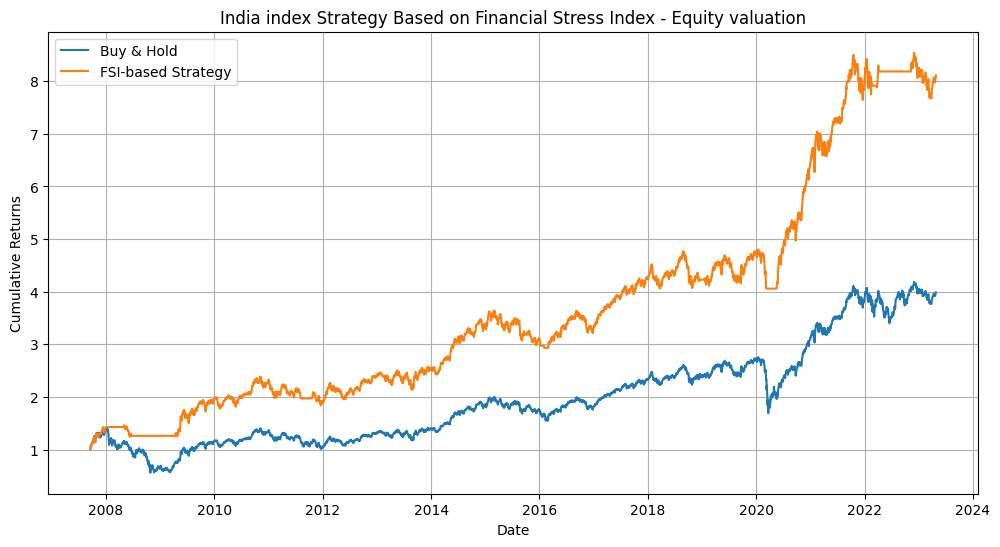

Annualized Returns:
0.095404
0.147903

Annualized Volatility:
0.218597
0.158969

Sharpe Ratios:
0.436437
0.930389

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.228503
dtype: float64
Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.95


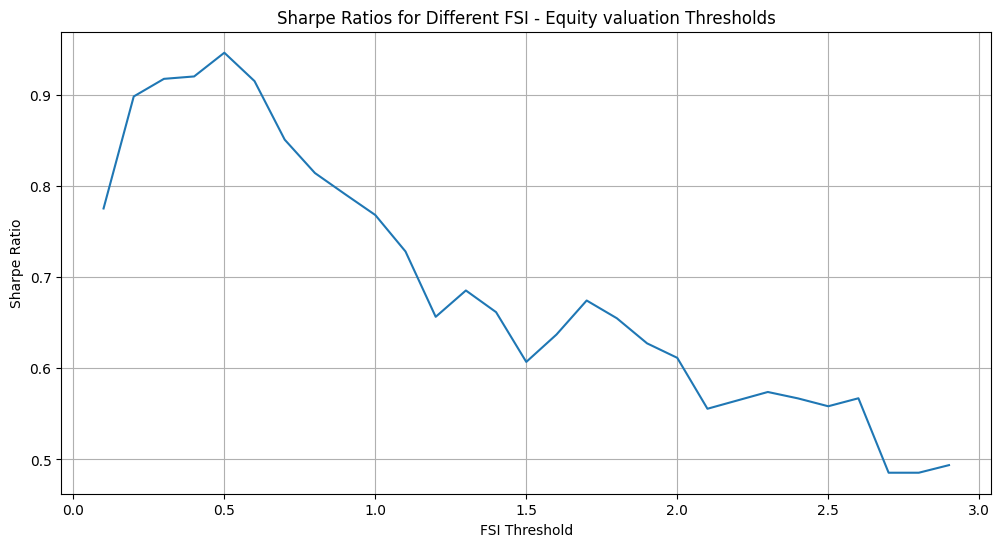

In [127]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^NSEI'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start="2008-01-01", end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where((strategy_data['Equity valuation'].shift(1) < fsi_threshold), 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI - Equity valuation Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


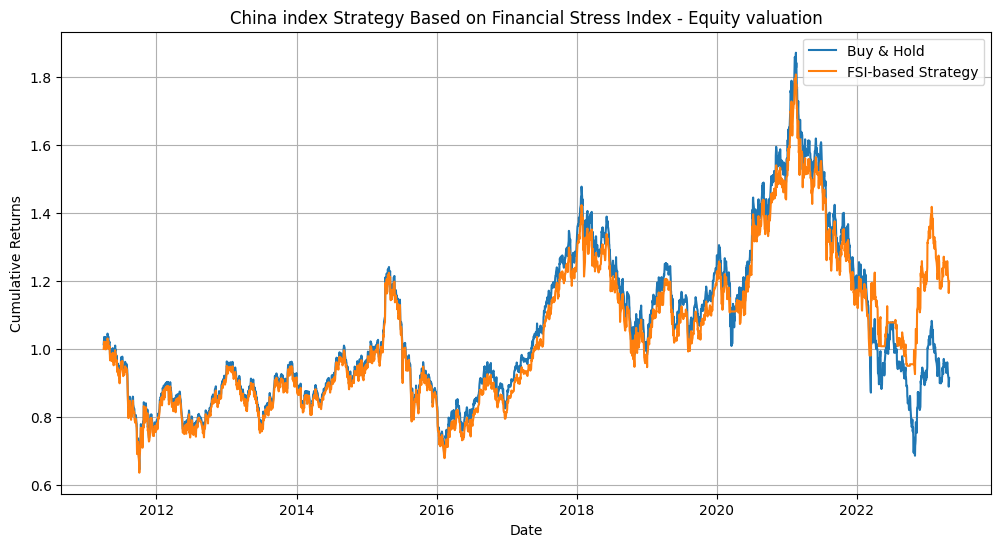

Annualized Returns:
-0.007373
 0.015123

Annualized Volatility:
0.264698
0.251137

Sharpe Ratios:
-0.027856
 0.060218

Maximum Drawdowns:
returns            -0.633913
strategy_returns   -0.488028
dtype: float64
Optimal FSI Threshold: 1.00
Optimal Sharpe Ratio: 0.18


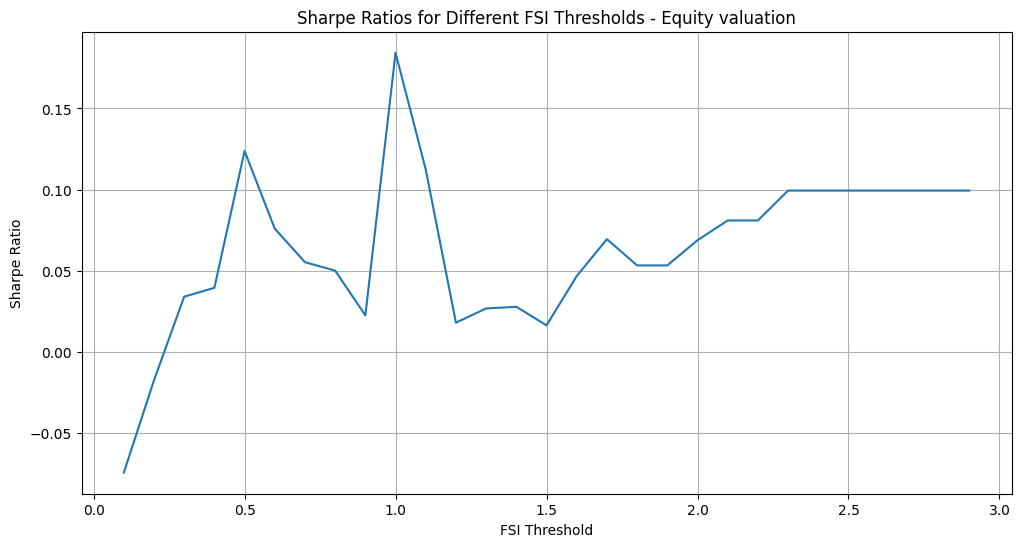

In [121]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
china_index = '^HSI'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(china_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 1  # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('China index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()


# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds - Equity valuation")
plt.grid()
plt.show()



Optimal FSI Threshold: 2.80
Optimal Sharpe Ratio: 0.59


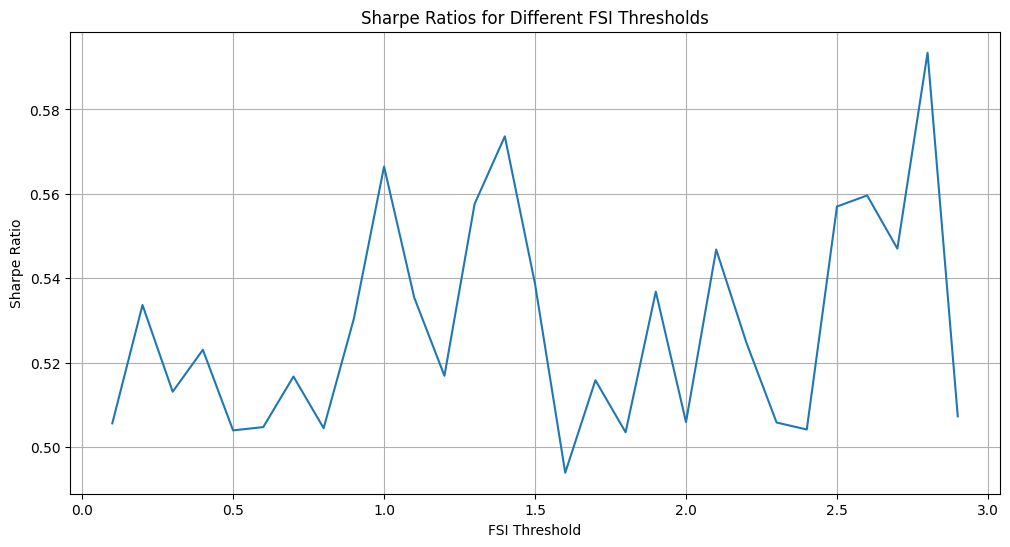

In [72]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


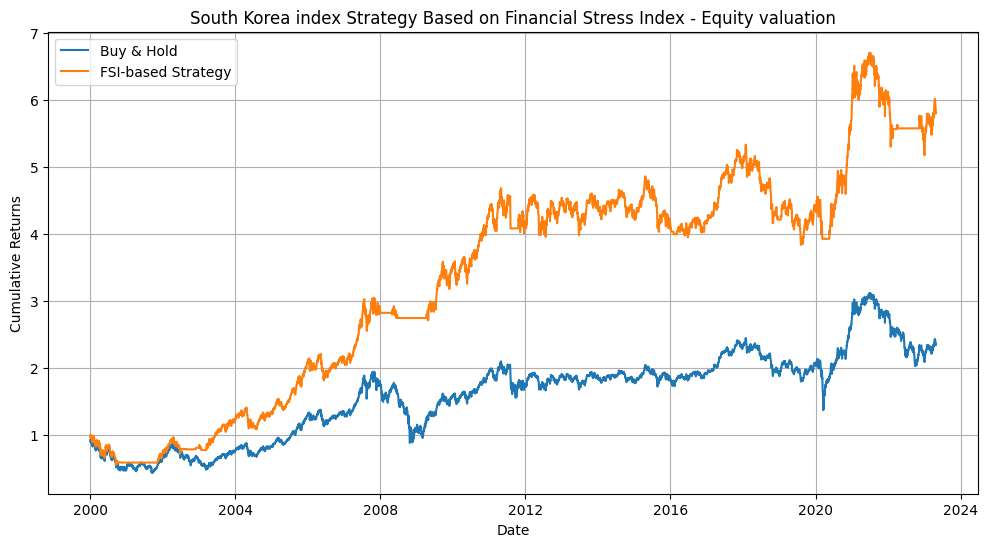

Annualized Returns:
0.095404
0.147903

Annualized Volatility:
0.218597
0.158969

Sharpe Ratios:
0.436437
0.930389

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.228503
dtype: float64


In [81]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^KS11'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5  # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('South Korea index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

Optimal FSI Threshold: 0.30
Optimal Sharpe Ratio: 0.58


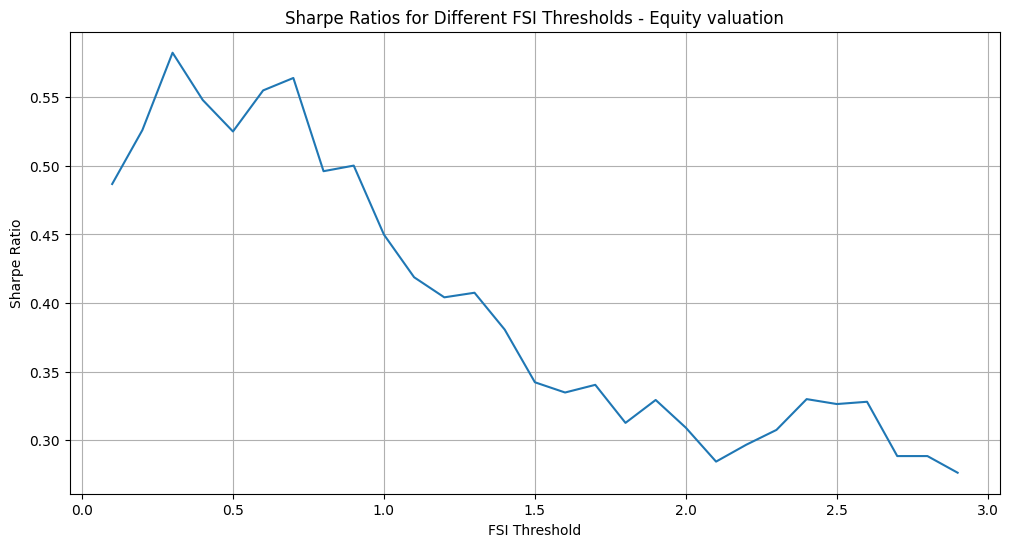

In [64]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds - Equity valuation")
plt.grid()
plt.show()


Optimal FSI Threshold: 1.60
Optimal Sharpe Ratio: 0.65


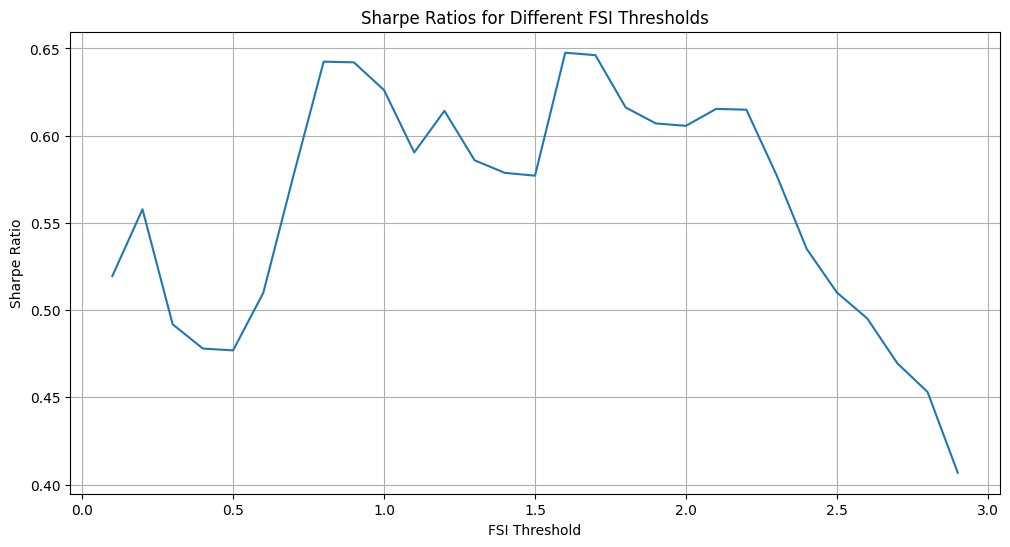

In [75]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


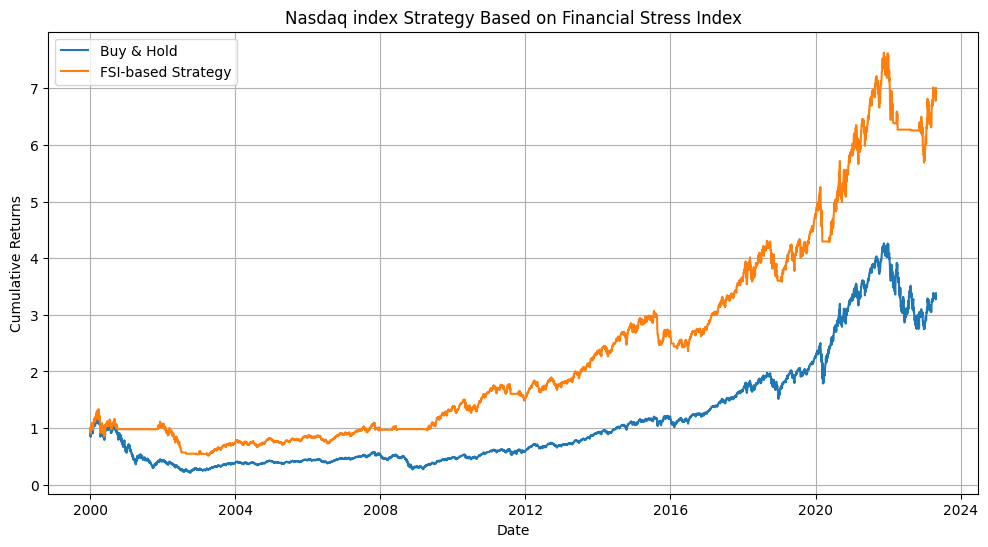

Annualized Returns:
0.095404
0.147903

Annualized Volatility:
0.218597
0.158969

Sharpe Ratios:
0.436437
0.930389

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.228503
dtype: float64


In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'QQQ'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Nasdaq index Strategy Based on Financial Stress Index')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.53


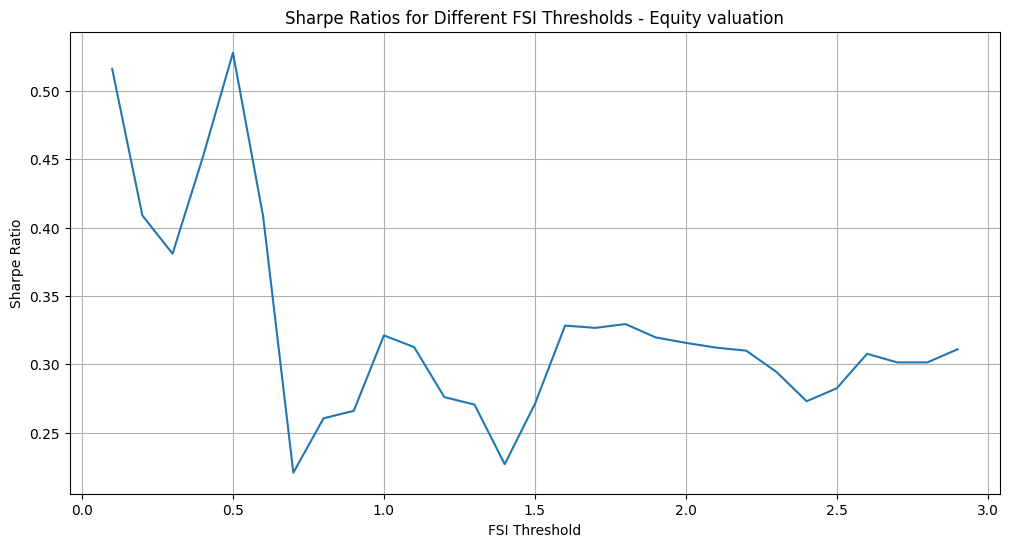

In [66]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds - Equity valuation")
plt.grid()
plt.show()


Optimal FSI Threshold: 0.20
Optimal Sharpe Ratio: 0.36


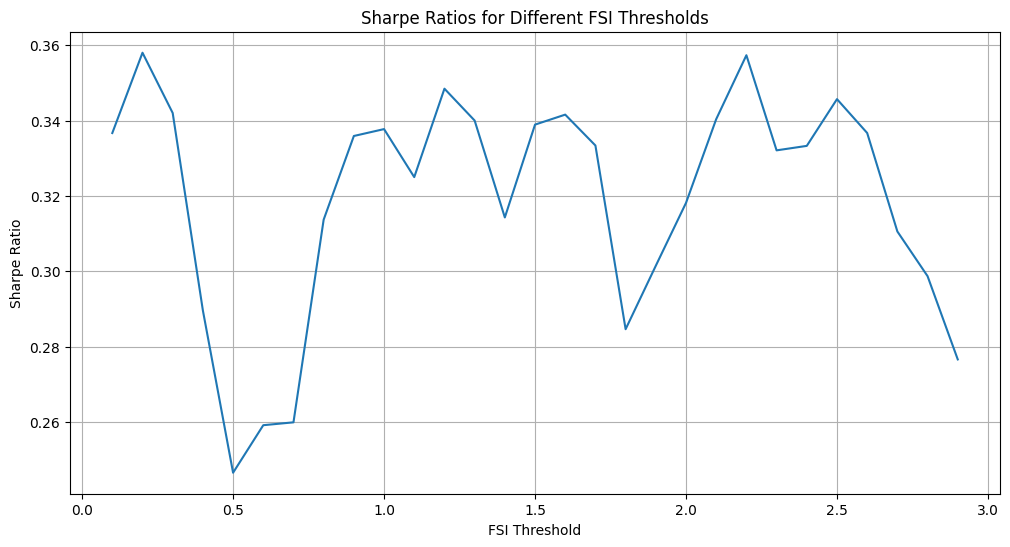

In [101]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()



[*********************100%***********************]  1 of 1 completed


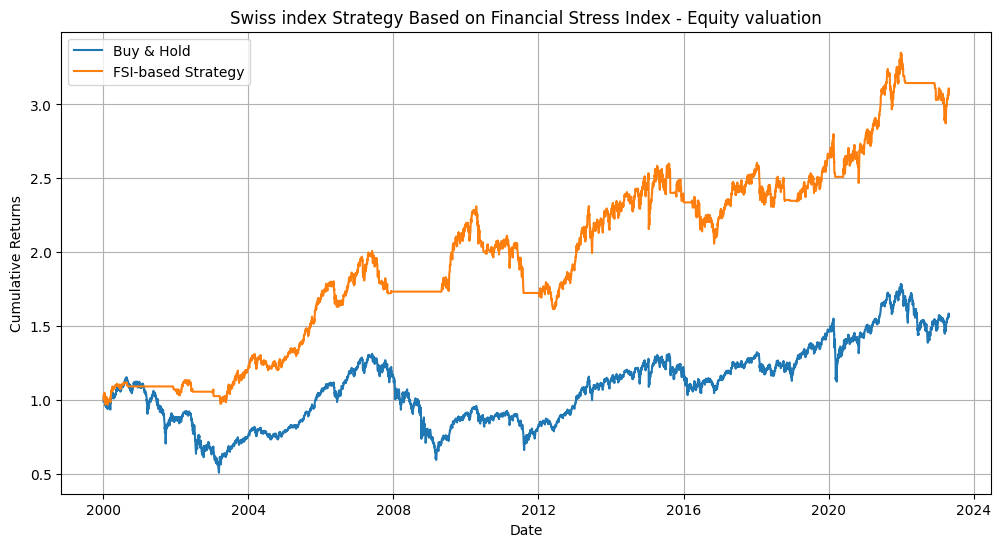

Annualized Returns:
0.019408
0.049419

Annualized Volatility:
0.180314
0.110974

Sharpe Ratios:
0.107637
0.445324

Maximum Drawdowns:
returns            -0.561251
strategy_returns   -0.301269
dtype: float64


In [99]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^SSMI'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.2 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Swiss index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


Optimal FSI Threshold: 0.20
Optimal Sharpe Ratio: 0.49


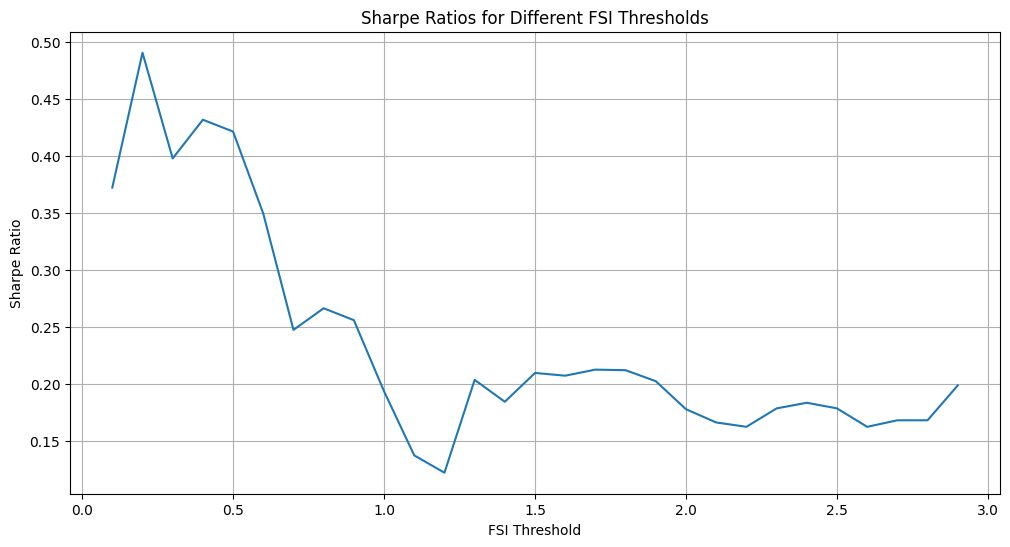

In [102]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


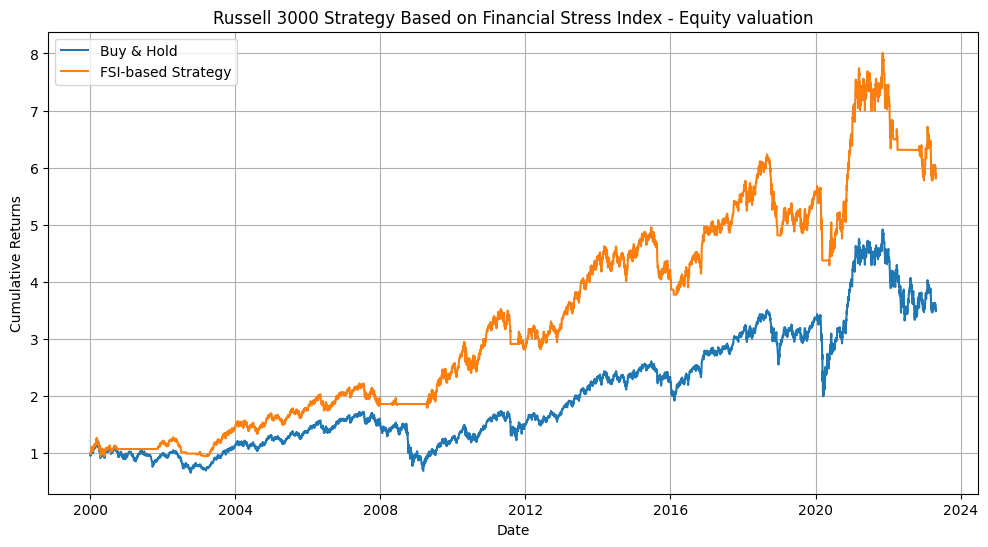

Annualized Returns:
0.055650
0.079067

Annualized Volatility:
0.247170
0.178864

Sharpe Ratios:
0.225148
0.442048

Maximum Drawdowns:
returns            -0.598888
strategy_returns   -0.311999
dtype: float64
Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.52


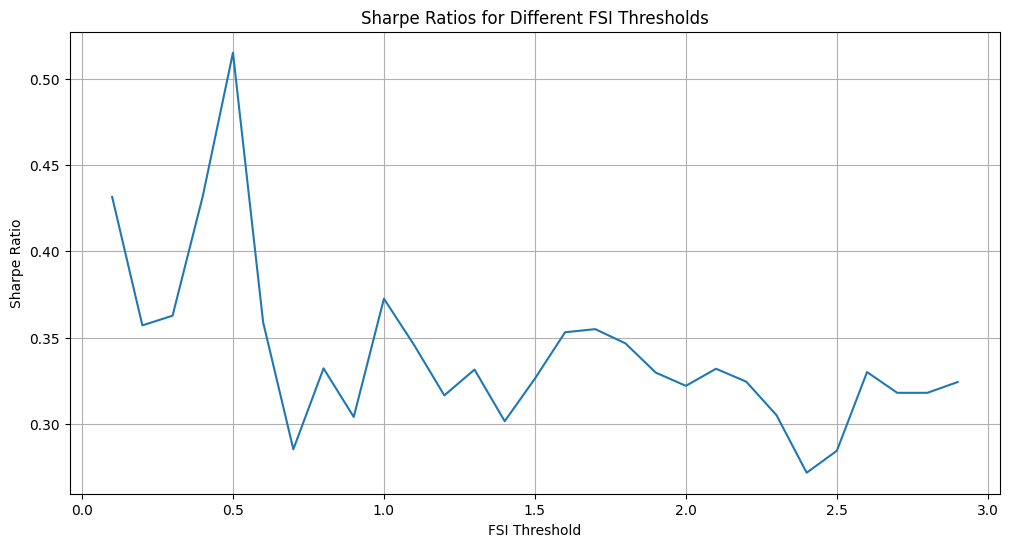

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^RUT'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Russell 3000 Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


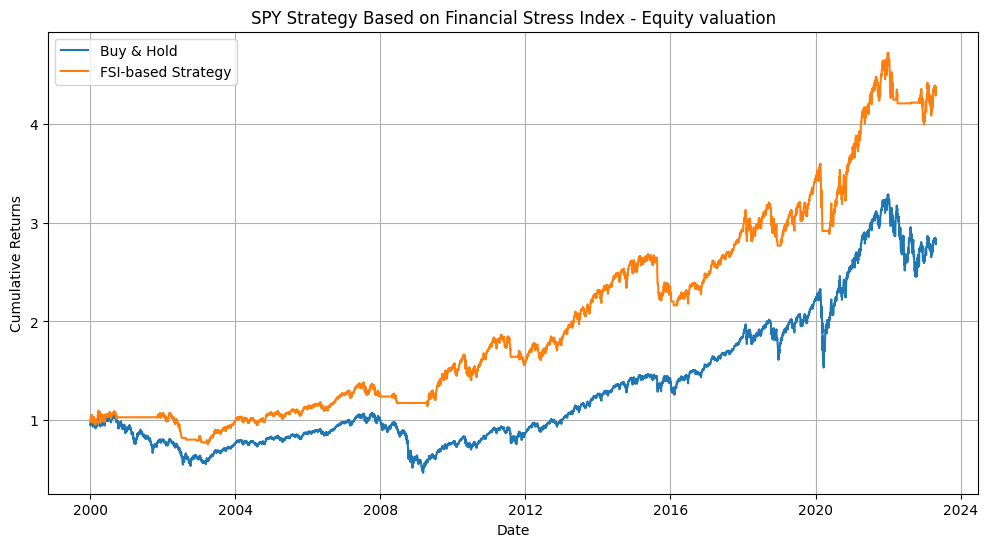

Annualized Returns:
0.045793
0.065407

Annualized Volatility:
0.198457
0.133221

Sharpe Ratios:
0.230744
0.490965

Maximum Drawdowns:
returns            -0.564737
strategy_returns   -0.312833
dtype: float64
Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.54


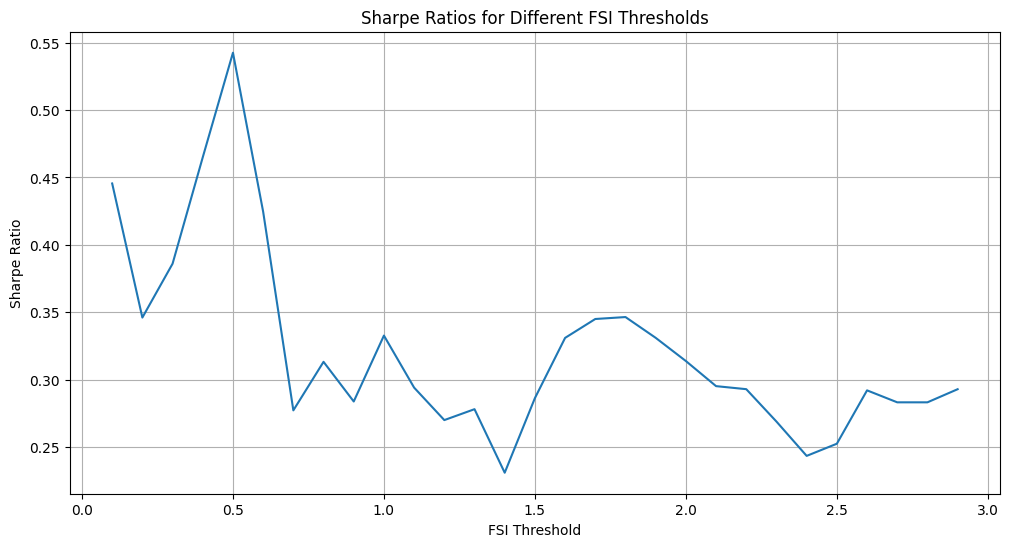

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'SPY'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('SPY Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'SPY'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('SPY Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


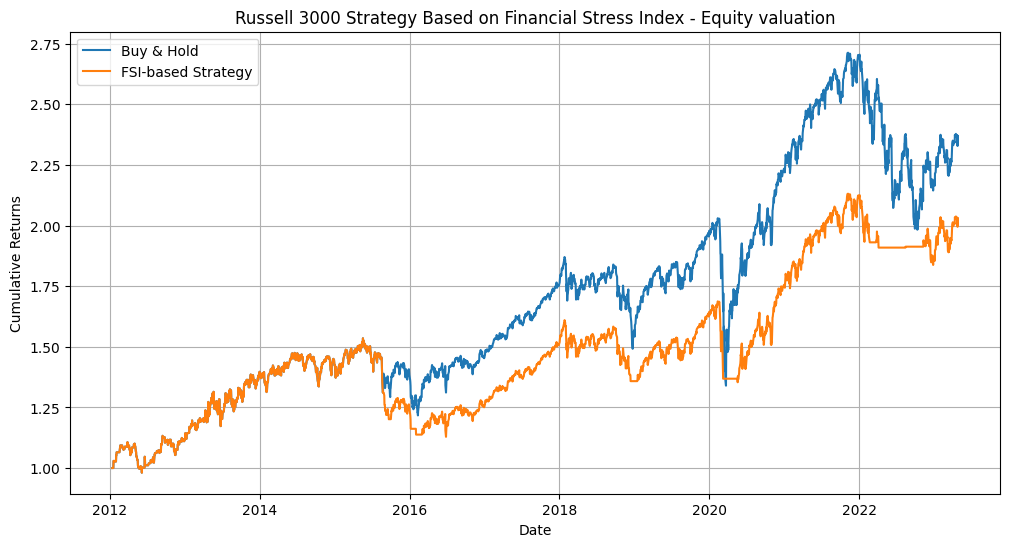

Annualized Returns:
0.079549
0.064849

Annualized Volatility:
0.177624
0.141035

Sharpe Ratios:
0.447850
0.459809

Maximum Drawdowns:
returns            -0.340090
strategy_returns   -0.264709
dtype: float64
Optimal FSI Threshold: 0.10
Optimal Sharpe Ratio: 0.56


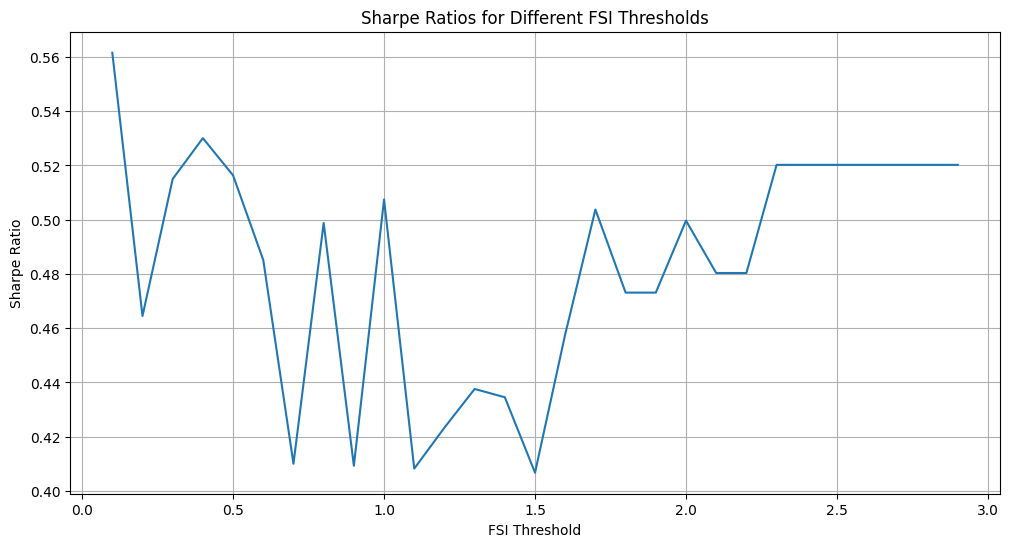

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'URTH'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Russell 3000 Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


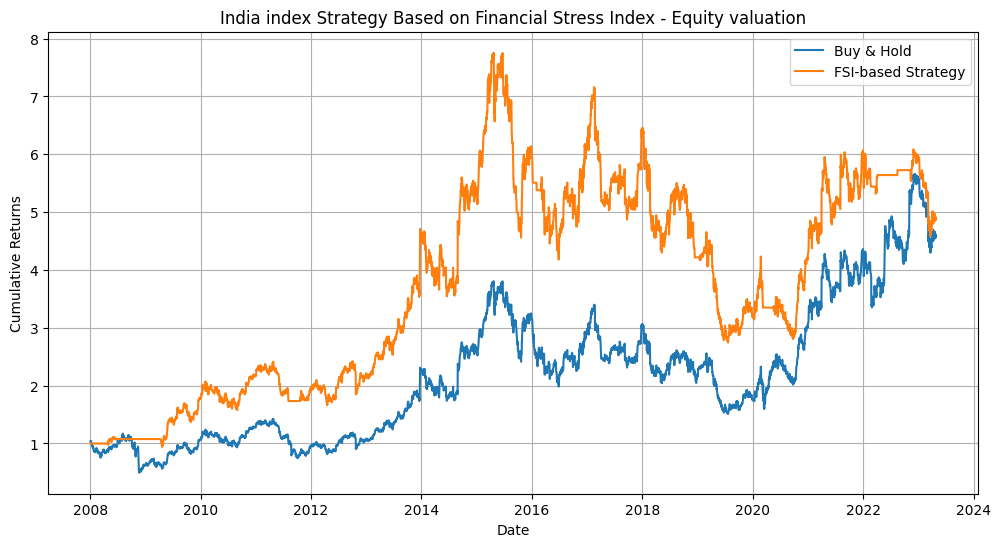

Annualized Returns:
0.104812
0.109465

Annualized Volatility:
0.367853
0.308980

Sharpe Ratios:
0.284929
0.354277

Maximum Drawdowns:
returns            -0.603044
strategy_returns   -0.645901
dtype: float64
Optimal FSI Threshold: 0.10
Optimal Sharpe Ratio: 0.56


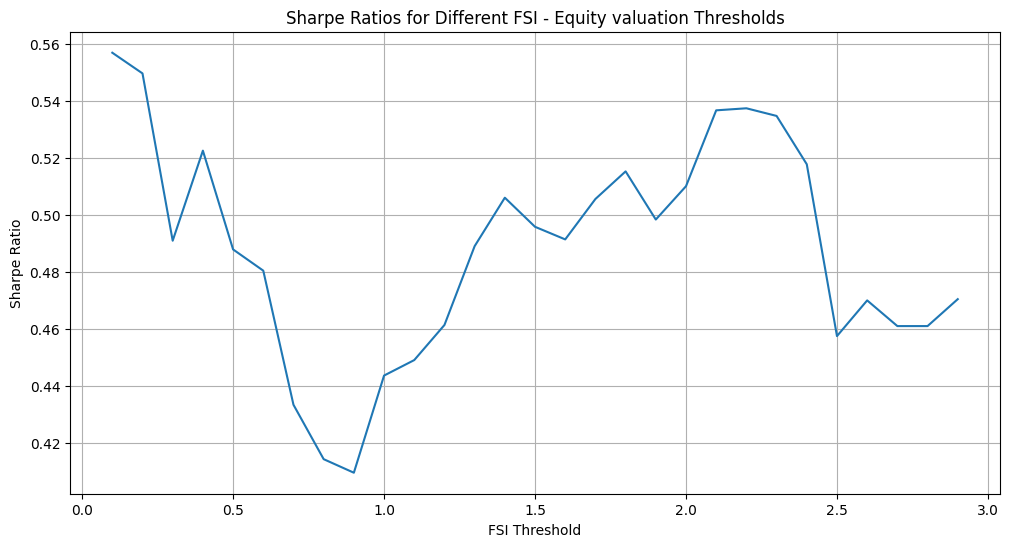

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'UTHR'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start="2008-01-01", end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where((strategy_data['Equity valuation'].shift(1) < fsi_threshold), 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI - Equity valuation Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


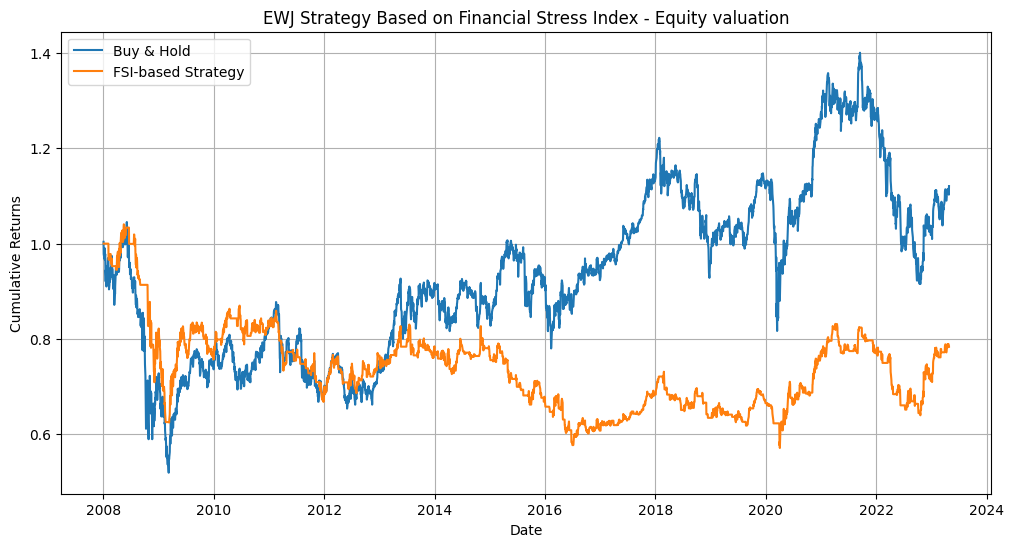

Performance Metrics for EWJ:
Annualized Returns:
 0.007478
-0.015819

Annualized Volatility:
0.211487
0.137264

Sharpe Ratios:
 0.035358
-0.115243

Maximum Drawdowns:
returns            -0.503254
strategy_returns   -0.451122
dtype: float64


[*********************100%***********************]  1 of 1 completed


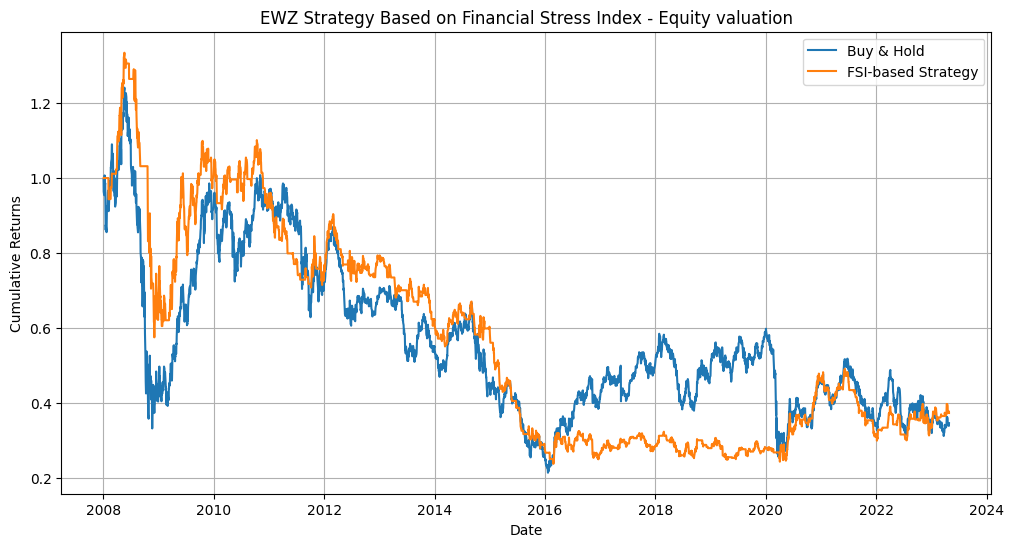

Performance Metrics for EWZ:
Annualized Returns:
-0.067028
-0.062353

Annualized Volatility:
0.394683
0.261724

Sharpe Ratios:
-0.169828
-0.238238

Maximum Drawdowns:
returns            -0.827511
strategy_returns   -0.821837
dtype: float64


[*********************100%***********************]  1 of 1 completed


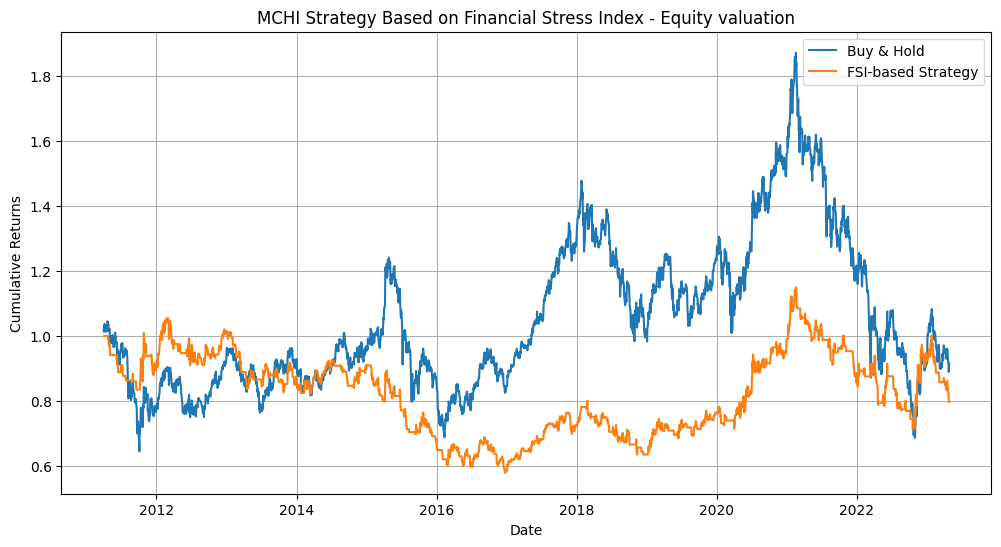

Performance Metrics for MCHI:
Annualized Returns:
-0.007373
-0.018661

Annualized Volatility:
0.264698
0.176138

Sharpe Ratios:
-0.027856
-0.105944

Maximum Drawdowns:
returns            -0.633913
strategy_returns   -0.451439
dtype: float64


[*********************100%***********************]  1 of 1 completed


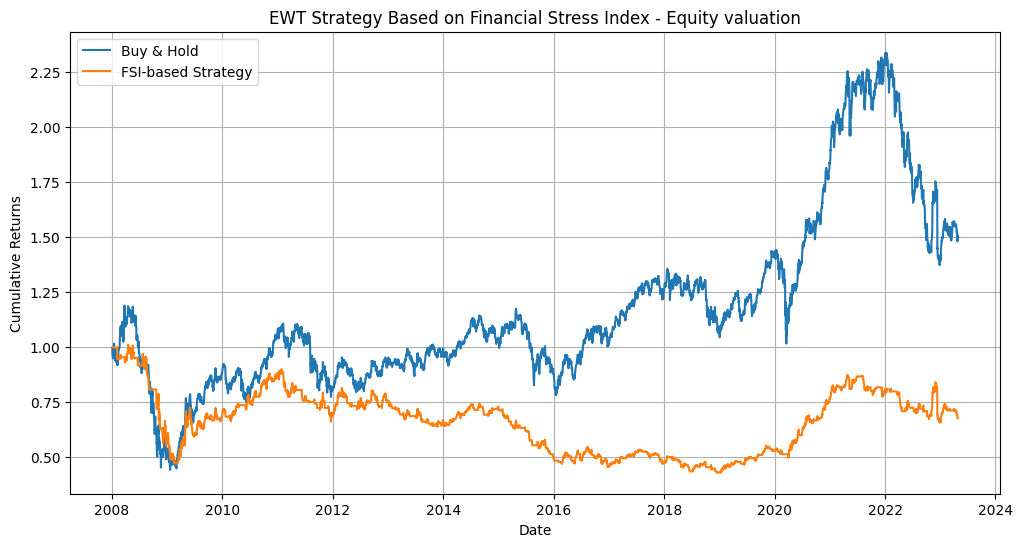

Performance Metrics for EWT:
Annualized Returns:
 0.027130
-0.025087

Annualized Volatility:
0.260051
0.179241

Sharpe Ratios:
 0.104325
-0.139961

Maximum Drawdowns:
returns            -0.627394
strategy_returns   -0.574490
dtype: float64


[*********************100%***********************]  1 of 1 completed


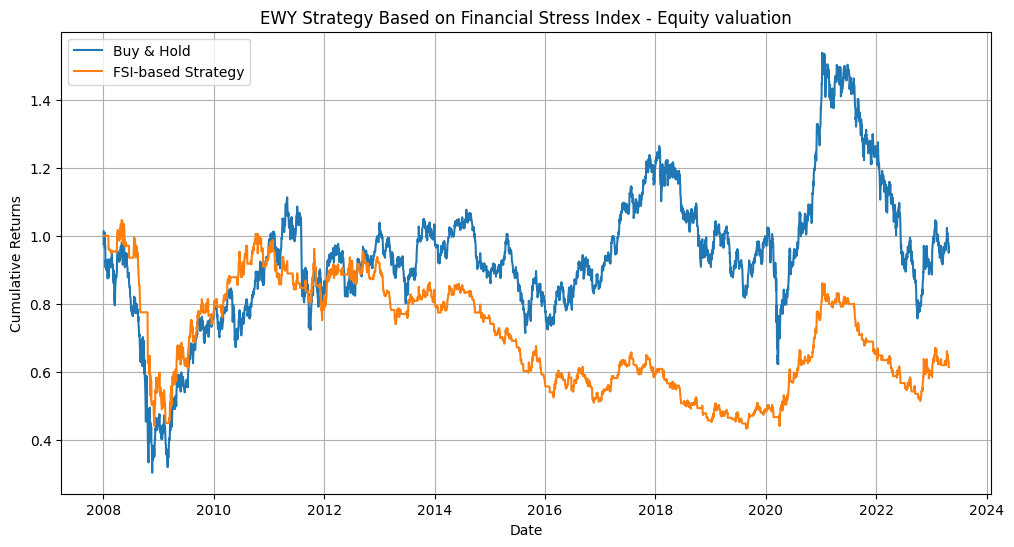

Performance Metrics for EWY:
Annualized Returns:
-0.002164
-0.031388

Annualized Volatility:
0.316882
0.209759

Sharpe Ratios:
-0.006829
-0.149639

Maximum Drawdowns:
returns            -0.700174
strategy_returns   -0.585533
dtype: float64


[*********************100%***********************]  1 of 1 completed


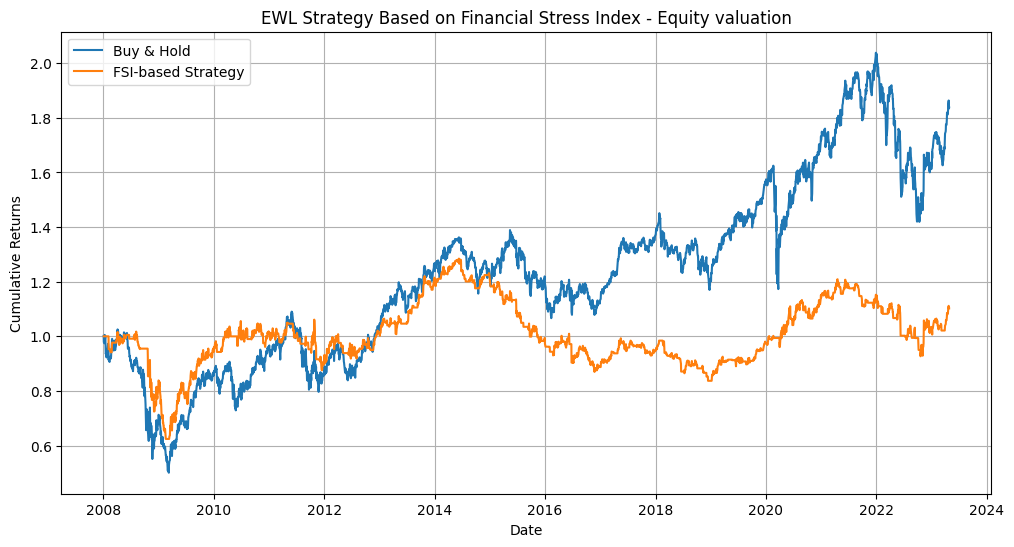

Performance Metrics for EWL:
Annualized Returns:
0.040571
0.006393

Annualized Volatility:
0.206377
0.138170

Sharpe Ratios:
0.196589
0.046267

Maximum Drawdowns:
returns            -0.511811
strategy_returns   -0.386368
dtype: float64


[*********************100%***********************]  1 of 1 completed


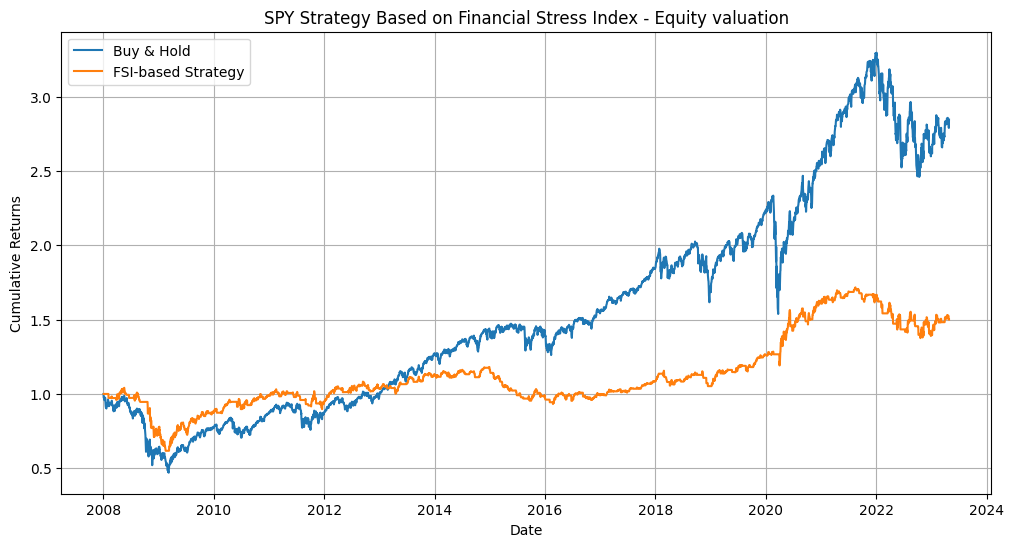

Performance Metrics for SPY:
Annualized Returns:
0.070733
0.026871

Annualized Volatility:
0.207029
0.126964

Sharpe Ratios:
0.341659
0.211639

Maximum Drawdowns:
returns            -0.529822
strategy_returns   -0.406948
dtype: float64


[*********************100%***********************]  1 of 1 completed


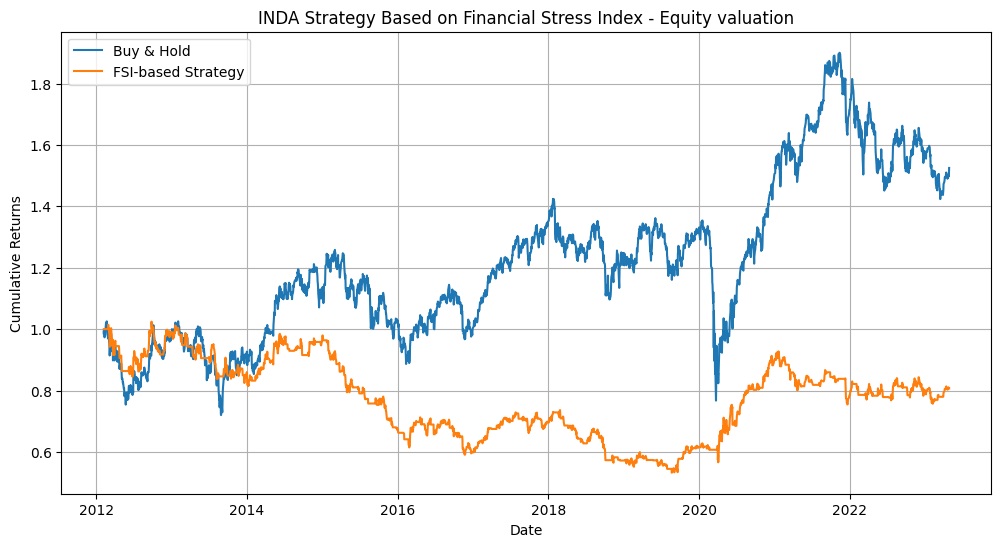

Performance Metrics for INDA:
Annualized Returns:
 0.038365
-0.018968

Annualized Volatility:
0.236634
0.154735

Sharpe Ratios:
 0.162130
-0.122582

Maximum Drawdowns:
returns            -0.461377
strategy_returns   -0.480414
dtype: float64


[*********************100%***********************]  1 of 1 completed


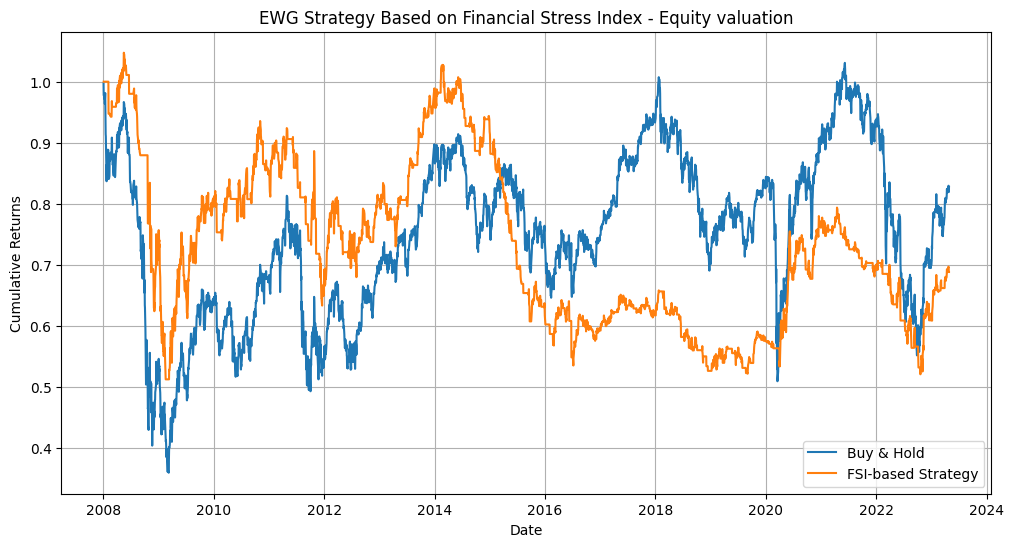

Performance Metrics for EWG:
Annualized Returns:
-0.012288
-0.024108

Annualized Volatility:
0.272572
0.184264

Sharpe Ratios:
-0.045080
-0.130837

Maximum Drawdowns:
returns            -0.639275
strategy_returns   -0.510609
dtype: float64


[*********************100%***********************]  1 of 1 completed


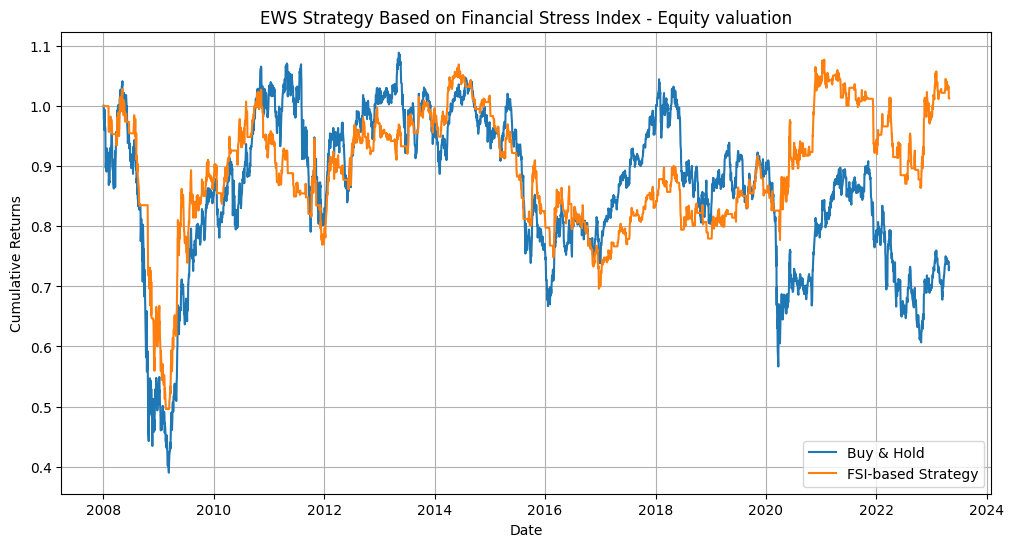

Performance Metrics for EWS:
Annualized Returns:
-0.020180
 0.000834

Annualized Volatility:
0.240962
0.165282

Sharpe Ratios:
-0.083747
 0.005048

Maximum Drawdowns:
returns            -0.625623
strategy_returns   -0.517937
dtype: float64




In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import empyrical as ep

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define tickers list
tickers = ['EWJ', 'EWZ', 'MCHI', 'EWT', 'EWY', 'EWL', 'SPY', 'INDA', 'EWG', 'EWS']

# Define start and end dates
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Loop through each ticker
for ticker in tickers:
    # Download data for the ticker from Yahoo Finance
    prices = yf.download(ticker, start="2008-01-01", end=end_date)['Close']

    # Calculate daily returns
    daily_returns = prices.pct_change()

    # Align datasets
    aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

    # Create a strategy DataFrame
    strategy_data = aligned_data.copy()

    # Calculate the 14-day SMA for the 'OFR FSI' column of the FSI and shift by 1 day to avoid look-ahead bias
    strategy_data['fsi_sma_14'] = strategy_data['OFR FSI'].rolling(window=14).mean().shift(1)

    # Generate the trading signal based on the SMA
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'] < strategy_data['fsi_sma_14'], 1, 0)

    # Calculate strategy returns using the signal from the previous day to avoid look-ahead bias
    strategy_data['strategy_returns'] = strategy_data['signal'].shift(1) * strategy_data['returns']

    # Calculate cumulative returns
    cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

    # Plot the strategy performance for the ticker
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns)
    plt.title(f'{ticker} Strategy Based on Financial Stress Index - Equity valuation')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(['Buy & Hold', 'FSI-based Strategy'])
    plt.grid()
    plt.show()

    # Compute performance metrics
    trading_days_per_year = 252
    annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
    annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
    sharpe_ratios = annualized_returns / annualized_volatility

    # Calculate maximum drawdown
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    max_drawdowns = drawdowns.min()

    # Print performance metrics for the ticker
    print(f"Performance Metrics for {ticker}:")
    print("Annualized Returns:")
    print(annualized_returns.to_string(index=False))
    print("\nAnnualized Volatility:")
    print(annualized_volatility.to_string(index=False))
    print("\nSharpe Ratios:")
    print(sharpe_ratios.to_string(index=False))
    print("\nMaximum Drawdowns:")
    print(max_drawdowns)
    print("\n" + "="*50 + "\n")


[*********************100%***********************]  1 of 1 completed


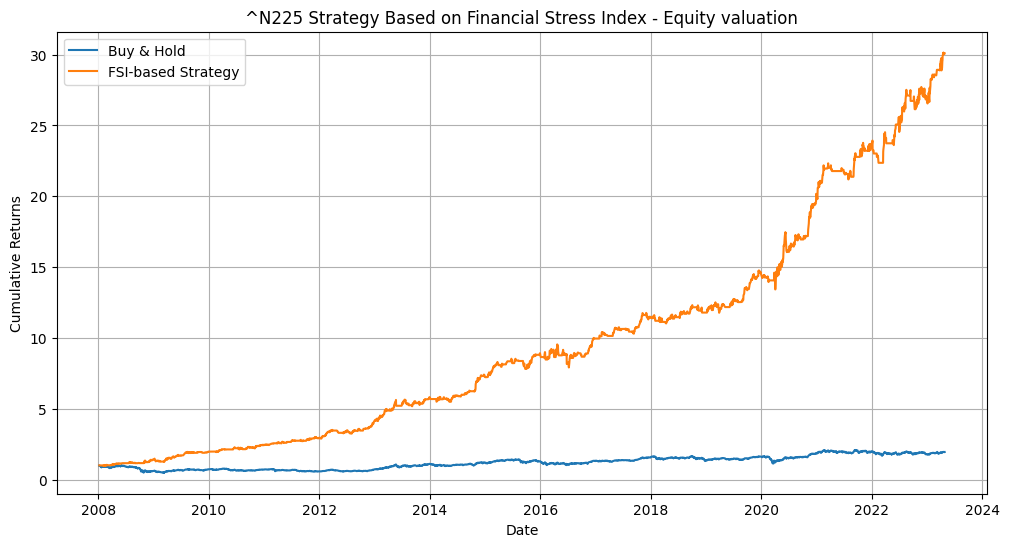

Performance Metrics for ^N225:
Annualized Returns:
0.045506
0.257513

Annualized Volatility:
0.238137
0.149778

Sharpe Ratios:
0.191091
1.719295

Maximum Drawdowns:
returns            -0.516754
strategy_returns   -0.170725
dtype: float64


[*********************100%***********************]  1 of 1 completed


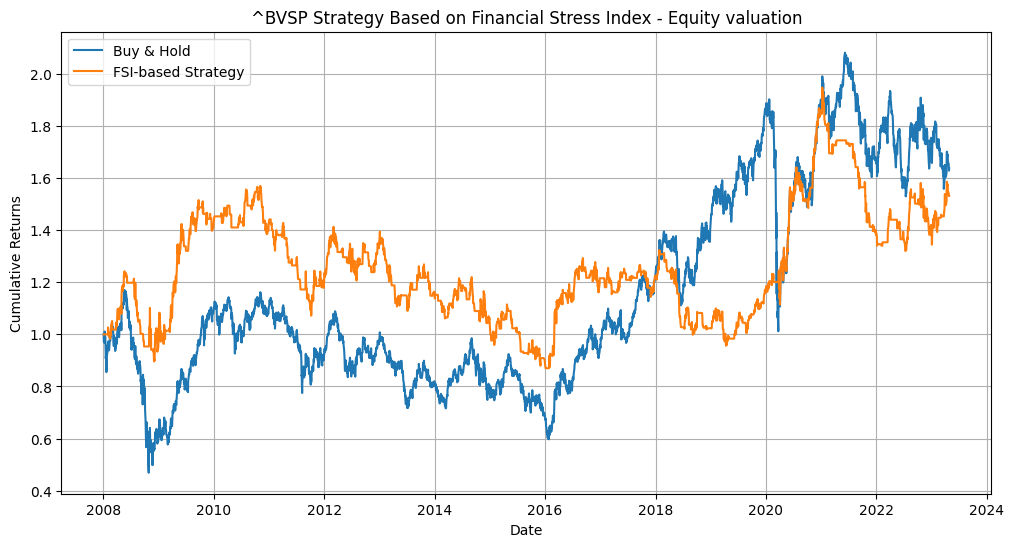

Performance Metrics for ^BVSP:
Annualized Returns:
0.033377
0.028758

Annualized Volatility:
0.276994
0.175802

Sharpe Ratios:
0.120498
0.163580

Maximum Drawdowns:
returns            -0.599616
strategy_returns   -0.445814
dtype: float64


[*********************100%***********************]  1 of 1 completed


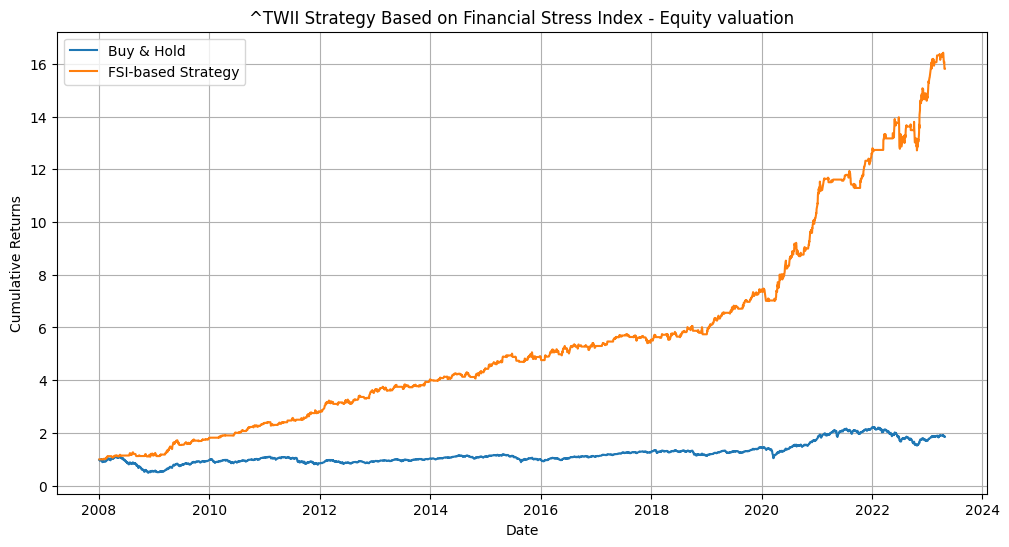

Performance Metrics for ^TWII:
Annualized Returns:
0.042281
0.203909

Annualized Volatility:
0.182633
0.118685

Sharpe Ratios:
0.231510
1.718072

Maximum Drawdowns:
returns            -0.559995
strategy_returns   -0.128500
dtype: float64


[*********************100%***********************]  1 of 1 completed


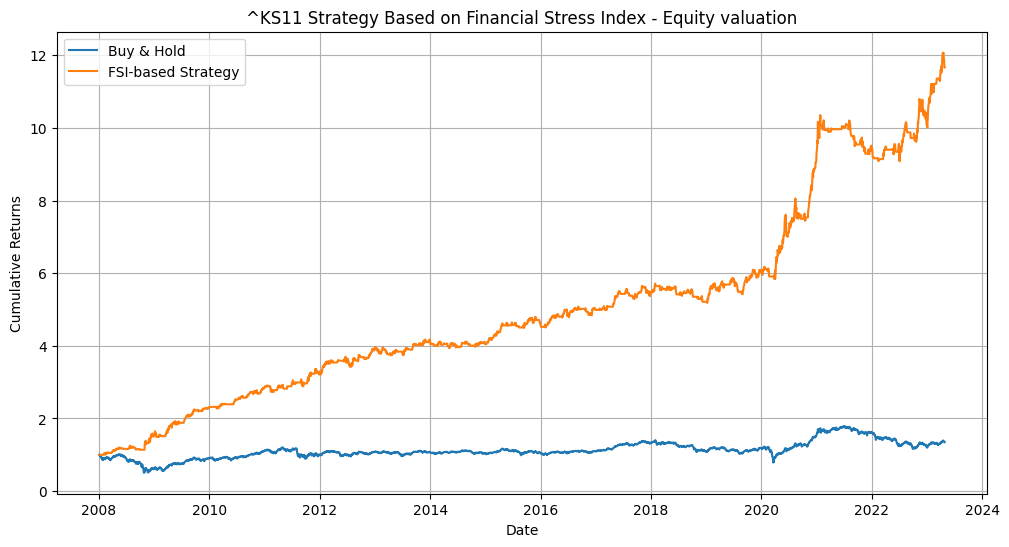

Performance Metrics for ^KS11:
Annualized Returns:
0.020014
0.177748

Annualized Volatility:
0.194980
0.123663

Sharpe Ratios:
0.102648
1.437355

Maximum Drawdowns:
returns            -0.503012
strategy_returns   -0.122709
dtype: float64


[*********************100%***********************]  1 of 1 completed


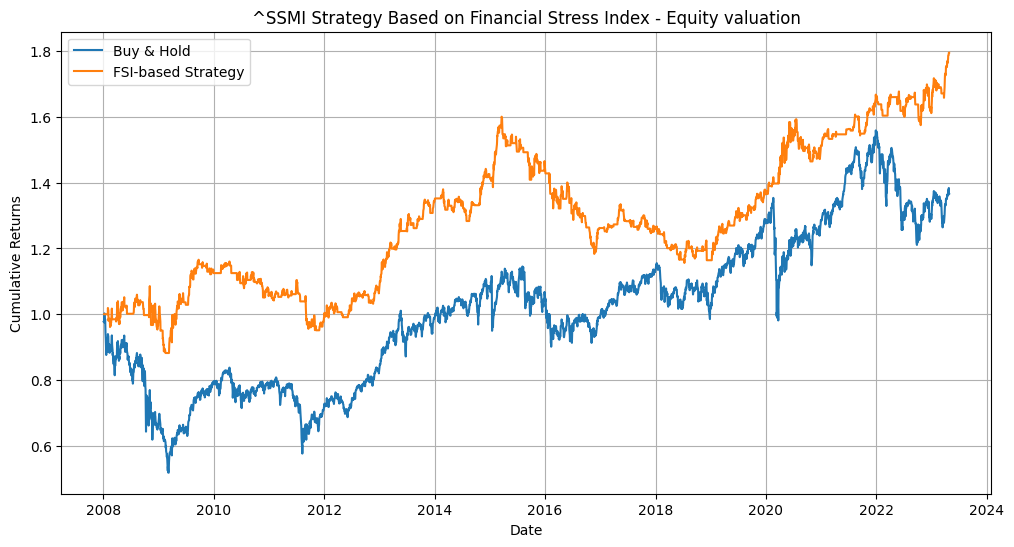

Performance Metrics for ^SSMI:
Annualized Returns:
0.020642
0.039104

Annualized Volatility:
0.178173
0.101848

Sharpe Ratios:
0.115853
0.383945

Maximum Drawdowns:
returns            -0.483480
strategy_returns   -0.277905
dtype: float64


[*********************100%***********************]  1 of 1 completed


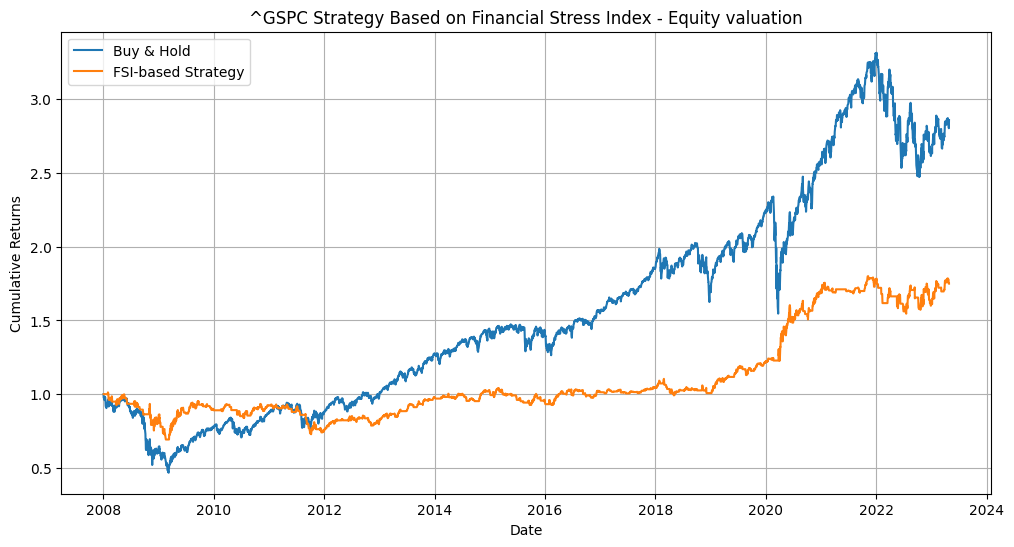

Performance Metrics for ^GSPC:
Annualized Returns:
0.071027
0.037217

Annualized Volatility:
0.208112
0.125135

Sharpe Ratios:
0.341295
0.297417

Maximum Drawdowns:
returns            -0.532512
strategy_returns   -0.315731
dtype: float64


[*********************100%***********************]  1 of 1 completed


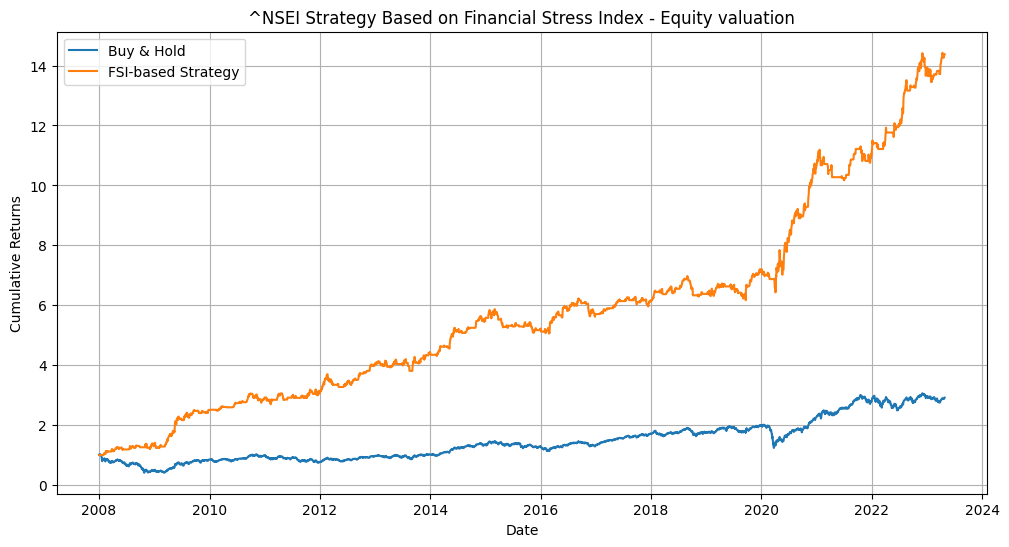

Performance Metrics for ^NSEI:
Annualized Returns:
0.074519
0.196083

Annualized Volatility:
0.216337
0.145635

Sharpe Ratios:
0.344458
1.346400

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.138417
dtype: float64


[*********************100%***********************]  1 of 1 completed


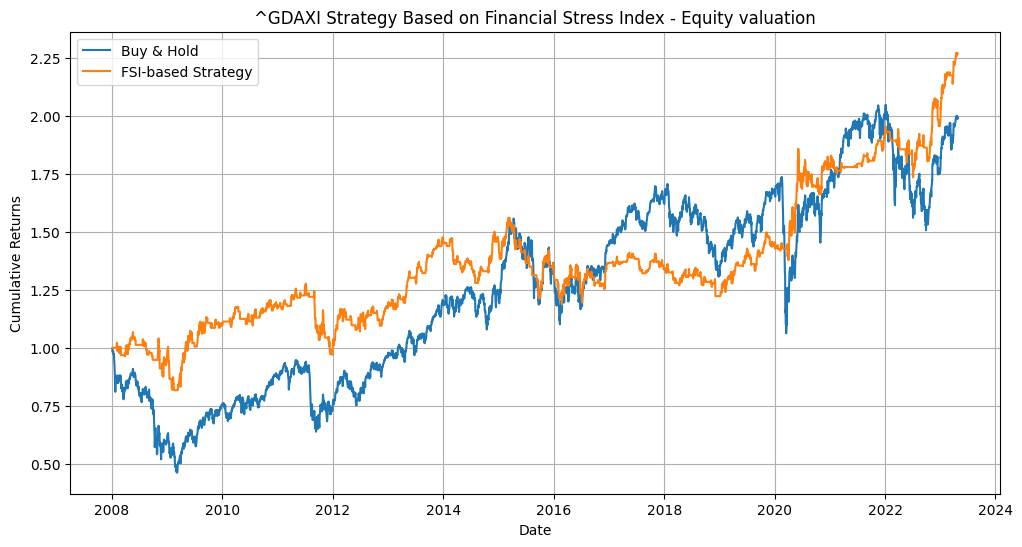

Performance Metrics for ^GDAXI:
Annualized Returns:
0.045557
0.054543

Annualized Volatility:
0.224473
0.140271

Sharpe Ratios:
0.202949
0.388837

Maximum Drawdowns:
returns            -0.536391
strategy_returns   -0.240697
dtype: float64


[*********************100%***********************]  1 of 1 completed


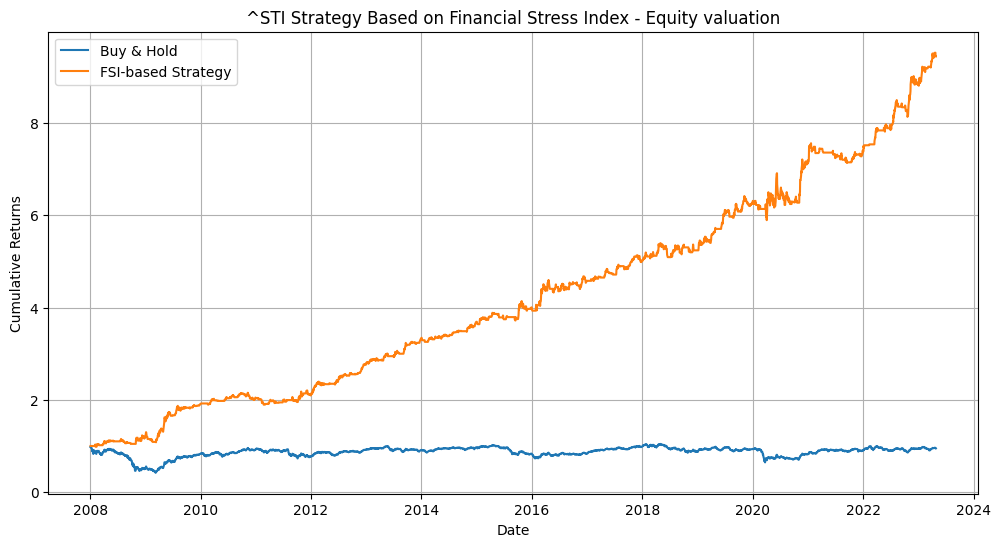

Performance Metrics for ^STI:
Annualized Returns:
-0.003498
 0.159486

Annualized Volatility:
0.168257
0.112596

Sharpe Ratios:
-0.020789
 1.416440

Maximum Drawdowns:
returns            -0.576196
strategy_returns   -0.169052
dtype: float64




In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import empyrical as ep

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define market indexes list
indexes = ['^N225', '^BVSP', '^TWII', '^KS11', '^SSMI', '^GSPC', '^NSEI', '^GDAXI', '^STI']

# Define start and end dates
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Loop through each market index
for index in indexes:
    # Download data for the index from Yahoo Finance
    prices = yf.download(index, start="2008-01-01", end=end_date)['Close']

    # Calculate daily returns
    daily_returns = prices.pct_change()

    # Align datasets
    aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

    # Create a strategy DataFrame
    strategy_data = aligned_data.copy()

    # Calculate the 14-day SMA for the 'OFR FSI' column of the FSI and shift by 1 day to avoid look-ahead bias
    strategy_data['fsi_sma_14'] = strategy_data['Equity valuation'].rolling(window=14).mean().shift(1)

    # Generate the trading signal based on the SMA
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'] < strategy_data['fsi_sma_14'], 1, 0)

    # Calculate strategy returns using the signal from the previous day to avoid look-ahead bias
    strategy_data['strategy_returns'] = strategy_data['signal'].shift(1) * strategy_data['returns']

    # Calculate cumulative returns
    cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

    # Plot the strategy performance for the index
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns)
    plt.title(f'{index} Strategy Based on Financial Stress Index - Equity valuation')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(['Buy & Hold', 'FSI-based Strategy'])
    plt.grid()
    plt.show()

    # Compute performance metrics
    trading_days_per_year = 252
    annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
    annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
    sharpe_ratios = annualized_returns / annualized_volatility

    # Calculate maximum drawdown
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    max_drawdowns = drawdowns.min()

    # Print performance metrics for the index
    print(f"Performance Metrics for {index}:")
    print("Annualized Returns:")
    print(annualized_returns.to_string(index=False))
    print("\nAnnualized Volatility:")
    print(annualized_volatility.to_string(index=False))
    print("\nSharpe Ratios:")
    print(sharpe_ratios.to_string(index=False))
    print("\nMaximum Drawdowns:")
    print(max_drawdowns)
    print("\n" + "="*50 + "\n")
